In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
file_path = '../factory-robot-unityproject/progress-logs/'
# filenames = [
#     'progress_2015-09-28-01',
#     'progress_2015-09-28-02',
#     'progress_2015-09-28-03',
# ]
filenames = [
#     'progress_B_2015-09-28-01',
#     'progress_B_2015-09-28-02',
    'progress_B_2015-09-28-03',
    'progress_2015-10-04-02--pca25'
]

file_labels = [
#     'stm=1  ; n_hidden=100',
#     'stm=10 ; n_hidden=100',
    'labeling network',
    'pca 25'
]

assert len(filenames) == len(file_labels)


In [21]:
data = []
for filename in filenames:
    f = open(file_path + filename)
    lines = f.readlines()
    f.close()
    
    # Discard lines up until a line starts with =
    first_line = 0
    for i, l in enumerate(lines):
        if l[0] == '=':
            first_line = i+1
            break
    cut_lines = lines[first_line:]
    
    time_reward_data = np.asarray([
            [float(f) for f in line.split(',')]
                for line in cut_lines])
    data.append(time_reward_data)

In [22]:
def smooth(a, smoothn=10):
    b = [np.mean(a[k-smoothn:k+smoothn]) for k in xrange(smoothn, len(a)-smoothn)]
    left  = [np.mean(a[:k]) for k in xrange(1, smoothn)]
    right = [np.mean(a[k:]) for k in xrange(len(a)-smoothn, len(a)-1)]
    result = np.empty_like(a)
    result[0] = a[0]
    result[1:smoothn] = left
    result[smoothn:len(a)-smoothn] = b
    result[len(a)-smoothn:-1] = right
    result[-1] = a[-1]
    return result

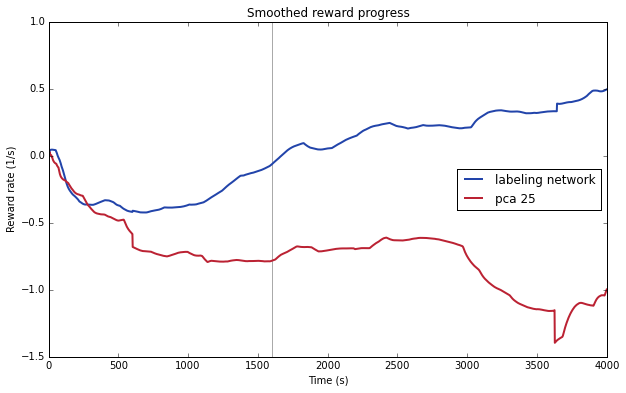

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.set_xlim(0, 4000)
ax.set_title('Smoothed reward progress')
ax.set_ylabel('Reward rate (1/s)')
ax.set_xlabel('Time (s)')
ax.axvline(x=1600, color='#aaaaaa')
colors = ['#2244aa', '#bb2233', '#88aa00', '#443300']
for d, file_label, color in zip(data, file_labels, colors):
    ax.plot(d[:, 0], smooth(d[:, 1], smoothn=300), label=file_label,
           linewidth=2, 
           color=color)
    

ax.legend(loc=5)
fig.savefig('../plots/smoothed-reward-progress.png')
plt.show()

In [8]:
zip([1, 2, 3], [4, 5, 6], [7, 8, 9])

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]